# X/Y dynamics

## Model

We model the evolution of system, assumming two variants of both X and Y with interference between them determining the offspring sex, with the following difference equation:

In [95]:
def evolve_next_generation(state):
    x1, x2, y1, y2 = state
    
    f_x1 = x1/(x1+x2)
    f_x2 = x2/(x1+x2)
    f_y1 = y1/(y1+y2)
    f_y2 = y2/(y1+y2)
    
    x1_y1_to_y1 = 0.5
    x2_y1_to_y1 = 0.46
    x1_y2_to_y2 = 0.5
    x2_y2_to_y2 = 0.5
    
    x1_y1_to_x1 = 1.0 - x1_y1_to_y1
    x2_y1_to_x2 = 1.0 - x2_y1_to_y1
    x1_y2_to_x1 = 1.0 - x1_y2_to_y2
    x2_y2_to_x2 = 1.0 - x2_y2_to_y2
    
    next_f_x1 = f_x1 * (f_y1 * x1_y1_to_x1 + f_y2 * x1_y2_to_x1)
    next_f_x2 = f_x2 * (f_y1 * x2_y1_to_x2 + f_y2 * x2_y2_to_x2)
    next_f_y1 = f_y1 * (f_x1 * x1_y1_to_y1 + f_x2 * x2_y1_to_y1)
    next_f_y2 = f_y2 * (f_x1 * x1_y2_to_y2 + f_x2 * x2_y2_to_y2)
    
    return next_f_x1, next_f_x2, next_f_y1, next_f_y2

This assumes that a pairing of x2 with y1 produces slightly more X chromosomes than Y chromosomes while all other pairings produce an X or Y chromosome at random.

## Dynamics

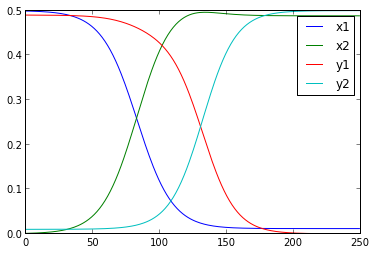

In [98]:
import numpy
no_gen = 250
dynamic_system = numpy.empty( (4, no_gen) )
dynamic_system[:,0] = (0.499, 0.001, 0.49, 0.01)
for i in range(1,no_gen):
    dynamic_system[:,i] = evolve_next_generation(dynamic_system[:,i-1])
    
from pylab import *
plot(dynamic_system[0,], label='x1')
plot(dynamic_system[1,], label='x2')
plot(dynamic_system[2,], label='y1')
plot(dynamic_system[3,], label='y2')
legend()

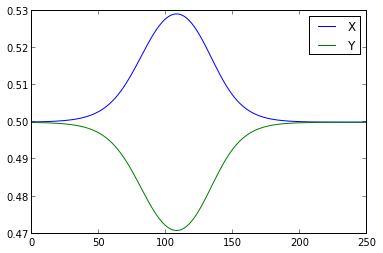

In [99]:
plot(dynamic_system[0,] + dynamic_system[1,], label='X')
plot(dynamic_system[2,] + dynamic_system[3,], label='Y')
legend()

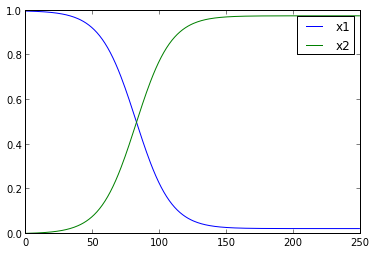

In [100]:
plot(dynamic_system[0,]/(dynamic_system[0,]+dynamic_system[1,]), label='x1')
plot(dynamic_system[1,]/(dynamic_system[0,]+dynamic_system[1,]), label='x2')
legend()